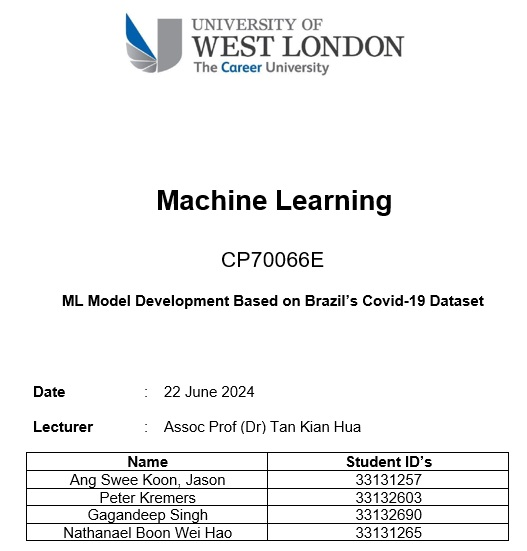

#**Table of Contents**

**Introduction**

**Problem Statement**

**Project Tasks & Deliverables**

**Exploratory Data Analysis**

**Data Preparation for ML**

**ML Model Development**

**AIF360 Ethical-and-Fairness**

**Conclusion**

**Executive Summary**

**Peer Assessment Form**

**References**



#**Introduction**

The COVID-19 pandemic has profoundly impacted nations worldwide, with Brazil being one of the hardest-hit countries. By May 26, 2021, Brazil had recorded over 16 million confirmed cases and 454,429 deaths, as reported by the Johns Hopkins Coronavirus Resource Centre (Johns Hopkins University, 2021). The pandemic's rapid escalation, beginning with the first case on February 26, 2020, led to widespread community transmission by March 20, 2020. This surge exerted immense pressure on Brazil's healthcare infrastructure, resulting in critical shortages of ICU beds, healthcare professionals, personal protective equipment, and other essential medical resources.

The severe strain on Brazil's healthcare system highlighted the urgent need for innovative solutions to manage the overwhelming demand and limited capacity. In response to this crisis, a team of data scientists at Sírio Libanês, a renowned healthcare institution in Brazil, took the initiative to leverage machine learning (ML) to develop a model capable of predicting the likelihood of a confirmed COVID-19 patient requiring ICU admission. This model aims to optimize resource allocation and improve patient outcomes by enabling proactive and informed decision-making in the healthcare system.

#**Problem Statement**

The primary challenge addressed in this report is the optimization of ICU resource allocation in Brazil's healthcare system during the COVID-19 pandemic. With the healthcare system under immense pressure, **the objective is to develop and validate a machine learning model that predicts the likelihood of ICU admission for COVID-19 patients**. By improving predictive capabilities, this model aims to assist healthcare professionals in making timely and informed decisions, ultimately enhancing patient outcomes and alleviating the strain on critical care resources.

The Sírio Libanês team has curated a comprehensive dataset comprising clinical data of COVID-19 patients and the target variable indicating the need for intensive care. By sharing this dataset on the Kaggle platform, they invite the global community to contribute their expertise and innovative insights to enhance patient care during the ongoing pandemic (Hospital Sírio-Libanês, 2020).

#**Project Tasks & Deliverables**

The team is tasked with performing a full lifecycle ML model development, following the objectives of the dataset. This involves several key stages.

1.   **Exploratory Data Analysis (EDA):** Initially, the team will undertake EDA to establish hypotheses regarding the predictive insights expected from the dataset. It is essential to consider the ethical dimensions of data analysis during this phase to ensure responsible and unbiased findings.

2.   **Data Preparation for ML:** Following the EDA, the team will prepare the data for machine learning, informed by the insights gained from the initial analysis. This stage is critical as it ensures that the data is clean, well-structured, and suitable for the ML algorithms to be employed.

3.   **ML Model Development:** The next step is the development of the ML model. The team is required to evaluate at least three machine learning algorithms that have been covered in this module. This evaluation should include a thorough assessment of associated issues such as hyperparameters tuning, performance metrics, and model complexity, specifically addressing concerns of underfitting and overfitting.

4.   **AIF360 Ethical-and-Fairness:** An integral part of the project is to ensure the ethical and fair use of the ML model. The team will utilize the AIF360 toolkit to evaluate and ensure fairness in the model. This includes measuring bias using metrics like disparate impact, equal opportunity, and disparate mistreatment. The team will need to pre-process the data to reduce bias, using techniques such as data reweighting, oversampling underrepresented groups, and synthetic data generation to balance the dataset. Additionally, post-processing adjustments or re-ranking of model predictions will be necessary to enhance fairness while maintaining overall model performance. Evaluating the model's fairness by observing how different fairness metrics change with various bias mitigation techniques and using AIF360's bias mitigation algorithms during model training to actively reduce bias in predictions is crucial.

# **Exploratory Data Analysis**

In order to gain a comprehensive understanding of the dataset and prepare it for subsequent modelling, a thorough exploratory data analysis (EDA) was conducted. This process involved several key steps, including data loading, handling missing values, verifying data types, generating descriptive statistics, visualizing key variables, and performing a correlation analysis. Each of these steps is detailed below.

**Loading the Dataset:** The analysis begins with loading the dataset from the specified file path using the pandas library. This dataset contains detailed information about COVID-19 patients and their likelihood of requiring ICU admission. By displaying the first few rows of the dataset, an initial understanding of its structure and contents was obtained. Additionally, the column names were printed to familiarize with the available features.

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [27]:
# Load the dataset
file_path = 'https://raw.githubusercontent.com/Peterkr-SOA/CP70066E/main/Kaggle_Sirio_Libanes_ICU_Prediction.xlsx'
data = pd.read_excel(file_path, engine='openpyxl')

In [28]:
# Display the first few rows and the columns of the dataset
print("First few rows of the dataset:")
print(data.head())
print("\nColumn names:")
print(data.columns)

First few rows of the dataset:
   PATIENT_VISIT_IDENTIFIER  AGE_ABOVE65 AGE_PERCENTIL  GENDER  \
0                         0            1          60th       0   
1                         0            1          60th       0   
2                         0            1          60th       0   
3                         0            1          60th       0   
4                         0            1          60th       0   

   DISEASE GROUPING 1  DISEASE GROUPING 2  DISEASE GROUPING 3  \
0                 0.0                 0.0                 0.0   
1                 0.0                 0.0                 0.0   
2                 0.0                 0.0                 0.0   
3                 0.0                 0.0                 0.0   
4                 0.0                 0.0                 0.0   

   DISEASE GROUPING 4  DISEASE GROUPING 5  DISEASE GROUPING 6  ...  \
0                 0.0                 1.0                 1.0  ...   
1                 0.0                 1.0

**Verifying Data Types:** Ensuring that each column in the dataset has the appropriate data type is crucial, as this affects how the data can be analysed and visualized. The data types of all columns were printed to verify that numeric variables were correctly identified as numerical data types (e.g., float64 or int64), and categorical variables were correctly identified as object data types. This step helped identify any discrepancies or misclassifications in the data types.

In [29]:
# Verify data types
print("\nData Types:")
print(data.dtypes)


Data Types:
PATIENT_VISIT_IDENTIFIER        int64
AGE_ABOVE65                     int64
AGE_PERCENTIL                  object
GENDER                          int64
DISEASE GROUPING 1            float64
                               ...   
RESPIRATORY_RATE_DIFF_REL     float64
TEMPERATURE_DIFF_REL          float64
OXYGEN_SATURATION_DIFF_REL    float64
WINDOW                         object
ICU                             int64
Length: 231, dtype: object


The dataset consists of 225 columns with a float64 type, 4 integer columns, and 2 object type columns.

**Handling Missing Values:** Missing values, a common issue in real-world datasets, can significantly impact analysis if not properly addressed. In this step.....

Missing values in dataset =  223863 



<Axes: >

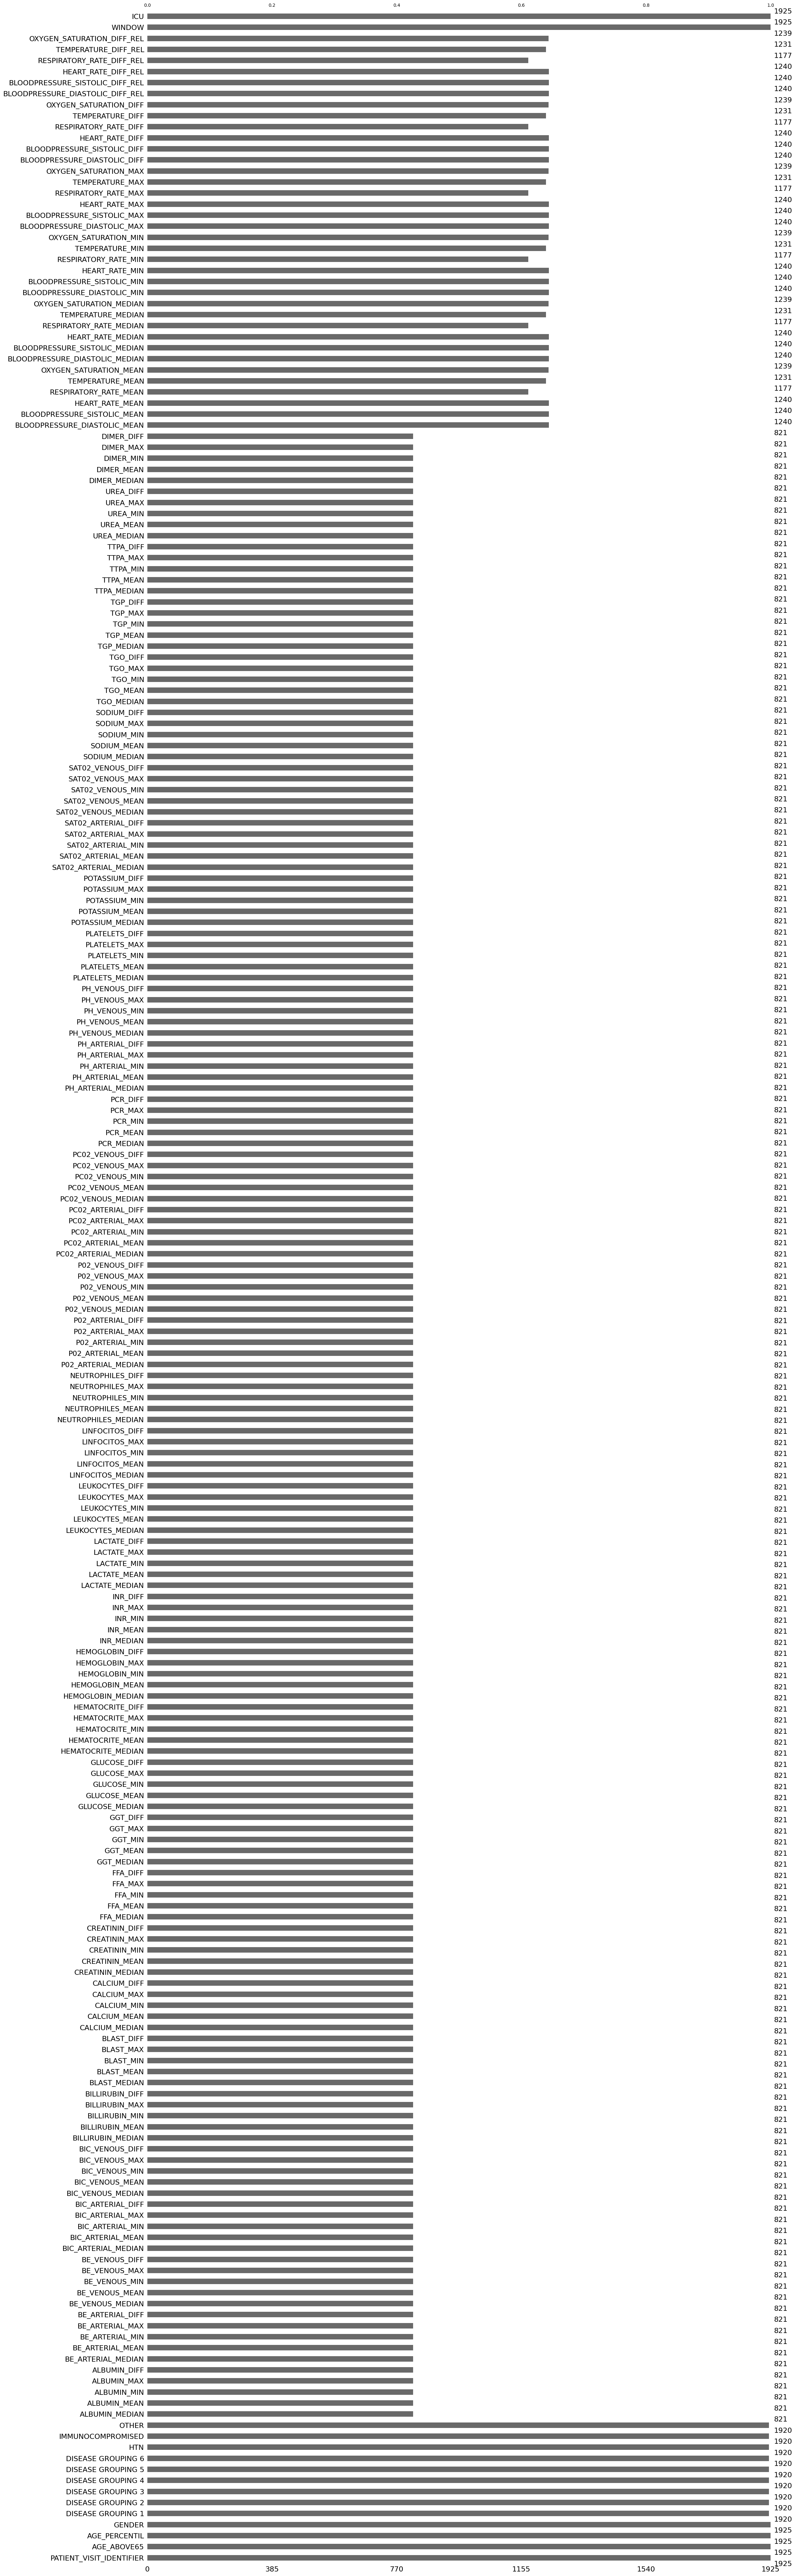

In [33]:
# Checking for missing values
print('Missing values in dataset = ',data.isnull().sum().sum(),'\n')

# Load missing data visualization library
import missingno as msno
msno.bar(data)

In [34]:
# Missing values in categorical columns
categorical_columns = data.select_dtypes(exclude=[np.number]).columns
print(f"Categorical columns: {categorical_columns}")
missing_values_AGE_PERCENTIL = data['AGE_PERCENTIL'].isnull().sum()
missing_values_WINDOW = data['WINDOW'].isnull().sum()

print(f"The number of missing values in column 'AGE_PERCENTIL' is: {missing_values_AGE_PERCENTIL}")
print(f"The number of missing values in column 'WINDOW' is: {missing_values_WINDOW}")

Categorical columns: Index(['AGE_PERCENTIL', 'WINDOW'], dtype='object')
The number of missing values in column 'AGE_PERCENTIL' is: 0
The number of missing values in column 'WINDOW' is: 0


**Observations on missing data:**  Significant portions of patient diagnostic data are incomplete. Eliminating the columns isn’t feasible as it would result in the loss of substantial data. The graph clearly indicates that approximately half of the numerical data is characterized by missing values. <BR>

According to the information provided by the data publishers, patient vital signs are recorded at varying intervals and frequencies. This implies that in instances where diagnostic data is absent, it can be reasonably inferred that there were no significant fluctuations in the vital signs during the periods without recorded values.


Categorical columns in this dataset did not contain any missing values.

**Descriptive Statistics.** Descriptive statistics provided a comprehensive overview of the dataset, summarizing the central tendency, dispersion, and shape of the distribution for each variable. Using the describe method, summary statistics were generated for both numerical and categorical variables. This included measures such as mean, median, standard deviation, and quartiles for numeric variables, and counts and unique values for categorical variables. These statistics helped in understanding the overall distribution and variability of the data.

In [18]:
# Descriptive statistics
print("\nDescriptive Statistics:")
print(data.describe(include='all'))


Descriptive Statistics:
        PATIENT_VISIT_IDENTIFIER  AGE_ABOVE65 AGE_PERCENTIL       GENDER  \
count                1925.000000  1925.000000          1925  1925.000000   
unique                       NaN          NaN            10          NaN   
top                          NaN          NaN          20th          NaN   
freq                         NaN          NaN           215          NaN   
mean                  192.000000     0.467532           NaN     0.368831   
std                   111.168431     0.499074           NaN     0.482613   
min                     0.000000     0.000000           NaN     0.000000   
25%                    96.000000     0.000000           NaN     0.000000   
50%                   192.000000     0.000000           NaN     0.000000   
75%                   288.000000     1.000000           NaN     1.000000   
max                   384.000000     1.000000           NaN     1.000000   

        DISEASE GROUPING 1  DISEASE GROUPING 2  DISEASE GROUPI

**Obeservations on the dataset:**
Upon reviewing the entire data set, it appears that the data has been normalized already, as the values fall within the range of -1 to 1, with the exception of the patient identifier and any categorical attributes.

There are five rows for each patient. Multiple entries represent different stages of the patient since its admission into the hospital. Additionally, the ‘Window’ column corresponds to the time period following hospital admission. <BR>
While there are 1925 rows in the dataset, based on the PATIENT_VISIT_IDENTIFIER column, there are only 385 unique patients.



In [19]:
#total number of unique patients
print(f"The total number of patients from the dataset is {data['PATIENT_VISIT_IDENTIFIER'].max()+1}")

The total number of patients from the dataset is 385


**Visualizations:** Visualizations are a powerful tool for exploring and understanding the data. Several types of plots were created to visualize the distribution of key variables. For instance, a histogram was used to visualize the distribution of the AGE_ABOVE65 variable, which indicates whether a patient is above 65 years old, providing insight into the proportion of patients in this age group. A count plot for the GENDER variable visualized the distribution of male and female patients. Additionally, box plots were used to identify outliers in continuous variables such as HEART_RATE_MEAN, BLOOD_PRESSURE_SISTOLIC_MEAN, and BLOOD_PRESSURE_DIASTOLIC_MEAN. Box plots are particularly useful for detecting outliers and understanding the spread of the data.

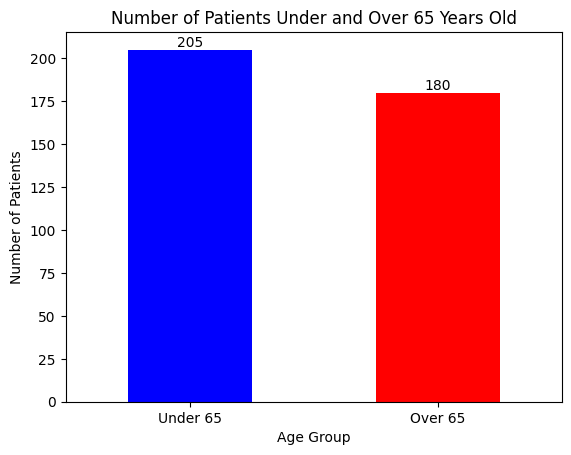

In [20]:
# Grouping the data by AGE_ABOVE65 and counting the unique patient IDs
age_groups = data.groupby('AGE_ABOVE65')['PATIENT_VISIT_IDENTIFIER'].nunique()

# Creating a bar chart
age_groups.plot(kind='bar', color=['blue', 'red'])
plt.title('Number of Patients Under and Over 65 Years Old')
plt.xlabel('Age Group')
plt.ylabel('Number of Patients')
plt.xticks([0, 1], ['Under 65', 'Over 65'], rotation=0)
for i, value in enumerate(age_groups):
    plt.text(i, value + 0.1, str(value), ha='center', va='bottom')
plt.show()

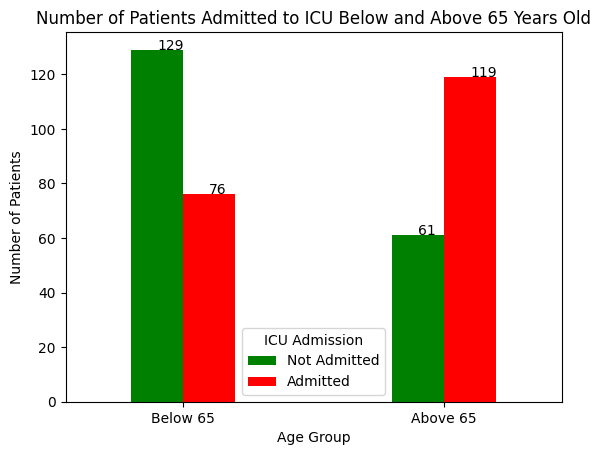

In [22]:
# Filter for unique patients while keeping the rows where the WINDOW column has a value of ABOVE_12
unique_above_12_patients_data = data[data['WINDOW'] == 'ABOVE_12'].drop_duplicates(subset='PATIENT_VISIT_IDENTIFIER')

# Grouping the unique patient data by AGE_ABOVE65 and ICU, and counting the unique patient IDs
age_icu_groups = unique_above_12_patients_data.groupby(['AGE_ABOVE65', 'ICU'])['PATIENT_VISIT_IDENTIFIER'].nunique().unstack()

# Creating a grouped bar chart with annotations
ax = age_icu_groups.plot(kind='bar', color=['green', 'red'], width=0.4)
plt.title('Number of Patients Admitted to ICU Below and Above 65 Years Old')
plt.xlabel('Age Group')
plt.ylabel('Number of Patients')
plt.xticks([0, 1], ['Below 65', 'Above 65'], rotation=0)
plt.legend(title='ICU Admission', labels=['Not Admitted', 'Admitted'])

# Adding annotations to the bar chart
for i in ax.patches:
    ax.text(i.get_x() + 0.1, i.get_height() + 0.1, str(int(i.get_height())), color='black')

plt.show()

**Observations from the Distribution of Age (Above 65):** Based on the provided histogram for the AGE_ABOVE65 variable, the following observations can be made:

1.   **Balanced Distribution:** The histogram shows two bars, representing patients aged 65 and below and patients aged above 65. The heights of the bars are relatively similar, indicating a balanced distribution between the two age groups.

2.   **Count of Patients:** The bar for patients aged 65 and below has a slightly higher count, with over 205 patients. The bar for patients aged above 65 has fewer patients: 180. This suggests that there are marginally more younger patients in the dataset, but the difference is not substantial.

3.   **Implications for Analysis:** This balanced age distribution is advantageous for predictive modelling as it ensures that the model can learn from both younger and older patient groups without being biased towards one group. It allows for a comprehensive analysis of how age impacts ICU admissions for COVID-19 patients.

4.  **ICU Admission:** While there are less patients above 65 years old in the dataset, they represent the largest group of patients admitted to the ICU. This confirms our hypothesis that older patients have a higher change of ending up on the ICU.

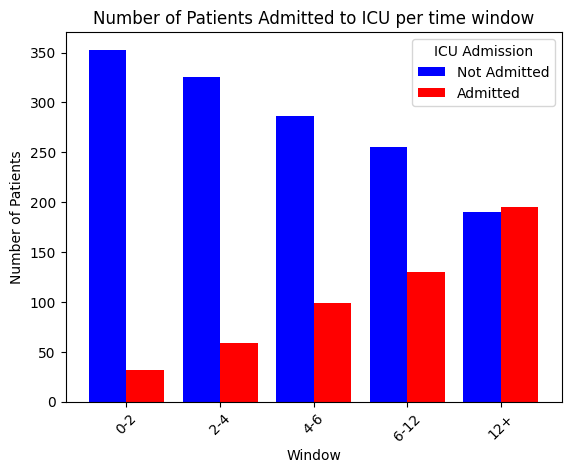

In [50]:
# Group the data by Window and ICU, and count the unique patient IDs
window_icu_groups = data.groupby(['WINDOW', 'ICU'])['PATIENT_VISIT_IDENTIFIER'].nunique().unstack()

# Create a bar chart with stacked bars
window_icu_groups.plot(kind='bar', stacked=False, color=['blue', 'red'], width=.8)
plt.title('Number of Patients Admitted to ICU per time window')
plt.xticks(range(len(["0-2","2-4","4-6","6-12","12+"])), ["0-2","2-4","4-6","6-12","12+"], rotation=45) #This line is changed
plt.xlabel('Window')
plt.ylabel('Number of Patients')
plt.legend(title='ICU Admission', labels=['Not Admitted', 'Admitted'])
plt.show()


**Observations from the Distribution of Gender:** There is a clear positive correlation between the Window and ICU Admission.  The probability of patients being transferred to the ICU increases with the length of their hospitalization. Consequently, data collected during later windows tend to be more indicative of the need for intensive care.

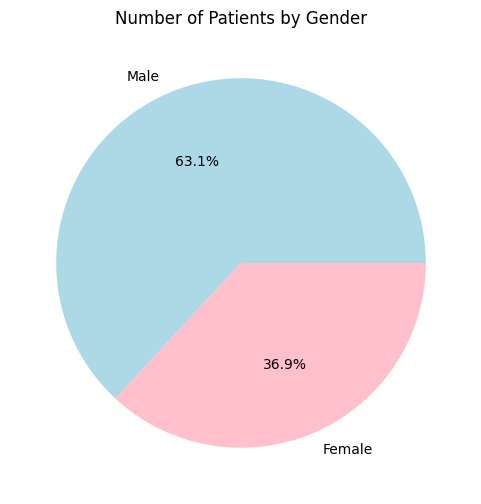

In [21]:
# Grouping the data by GENDER_LABEL and counting the unique patient IDs
gender_groups = data.groupby('GENDER')['PATIENT_VISIT_IDENTIFIER'].nunique()

# Creating a pie chart
plt.figure(figsize=(6, 6))
plt.pie(gender_groups, labels=['Male', 'Female'], autopct='%1.1f%%', colors=['lightblue', 'pink'])
plt.title('Number of Patients by Gender')
plt.show()

**Observations from the Distribution of Gender:** Based on the provided histogram for the GENDER variable, the following observations can be made:

1.   **Gender Distribution:** The dataset contains more male patients than female patients. Specifically, the count of male patients is approximately 243, whereas the count of female patients is around 142.

2.   **Proportional Analysis:** This indicates a gender imbalance in the dataset, with males constituting a larger portion of the patient population. Approximately 63% of the patients are male, while 36% are female.

3.   **Potential Implications:** The gender imbalance should be taken into account when developing predictive models to ensure that the models do not inadvertently favor one gender over the other. It is important to ensure that the predictive performance is equitable across genders.

4.   **Clinical Relevance:** From a clinical perspective, the higher number of male patients may reflect known trends in COVID-19 infection rates and severity, as some studies suggest that males are more likely to experience severe outcomes from COVID-19.

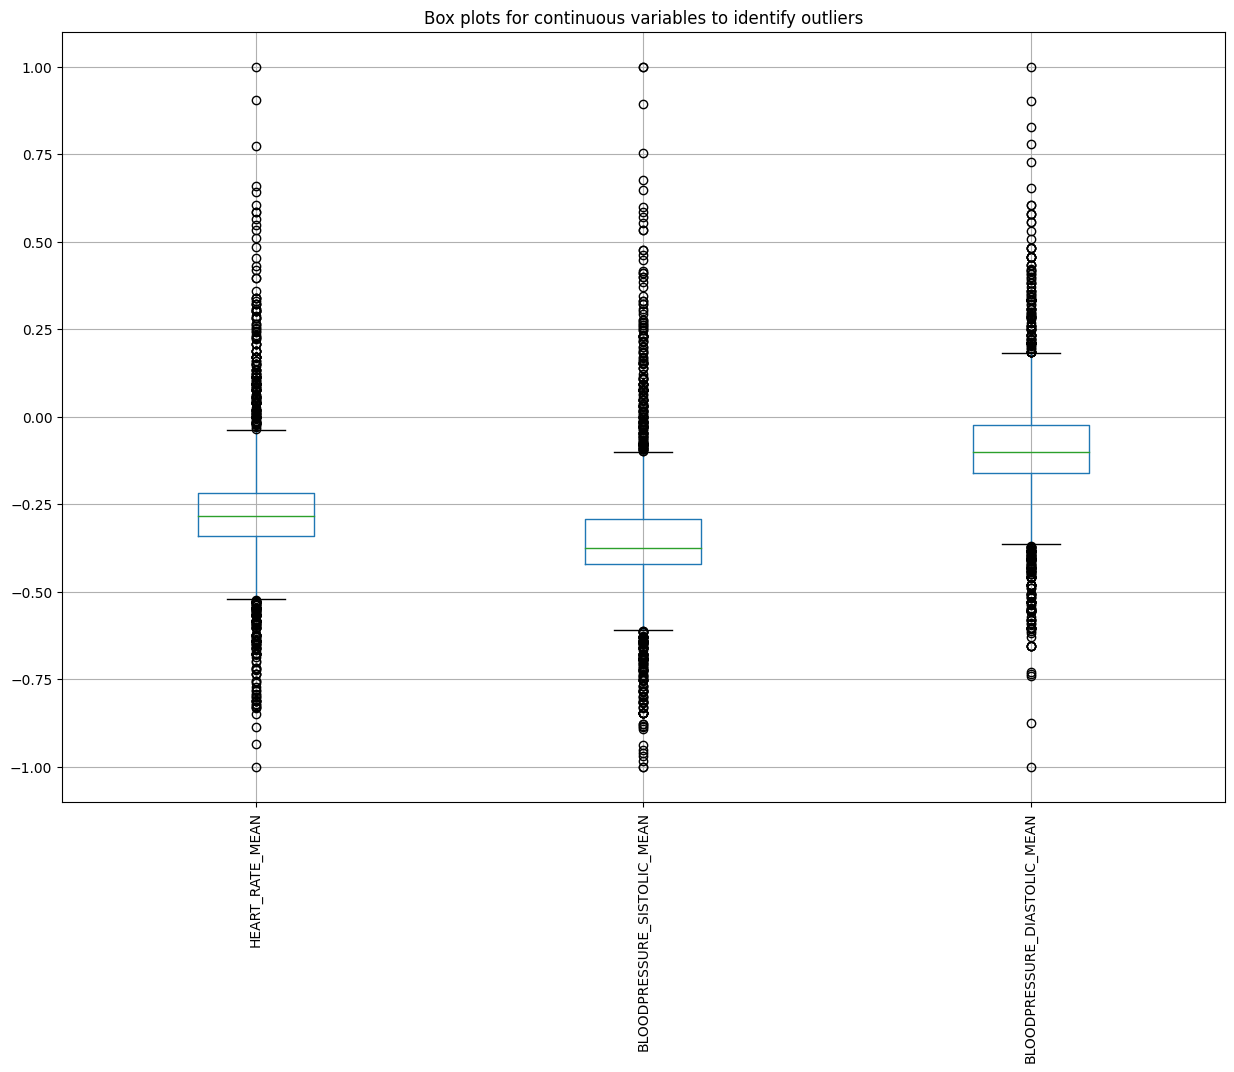

In [ ]:
# Continuous variables to plot
continuous_columns = ['HEART_RATE_MEAN', 'BLOODPRESSURE_SISTOLIC_MEAN', 'BLOODPRESSURE_DIASTOLIC_MEAN']

# Create box plots for the selected continuous variables
plt.figure(figsize=(15, 10))
data[continuous_columns].boxplot()
plt.xticks(rotation=90)
plt.title('Box plots for continuous variables to identify outliers')
plt.show()

**Observations from the Box Plots:** Based on the box plots for the continuous variables, the following observations can be made:

1.   **Presence of Outliers:** All three variables display a significant number of outliers. Outliers are represented by the circles beyond the whiskers of each box plot. These data points fall far from the interquartile range (IQR) and indicate unusual values in the dataset.

2.   **Distribution Symmetry:** All three box plots show some degree of symmetry around the median, but the presence of outliers indicates that the distributions are not perfectly normal. The whiskers extend more on one side, suggesting potential skewness in the data.

3.   **Range of Values:** The range of values for all three variables is quite extensive, spanning from approximately -1 to 1. This range indicates that the data has been standardized or normalized, given that physiological measurements such as heart rate and blood pressure typically have different units and scales.

**Correlation Analysis:** Correlation analysis was conducted to uncover relationships between variables in the dataset. By selecting only numeric columns, a correlation matrix was created, showing the pairwise correlation coefficients between all numeric variables. This correlation matrix was then visualized using a heatmap, where each cell represented the correlation coefficient between two variables. The heatmap allowed for easy identification of strong positive or negative correlations, providing insights into how different variables interact with each other. This step was crucial for identifying potential predictors for ICU admission.

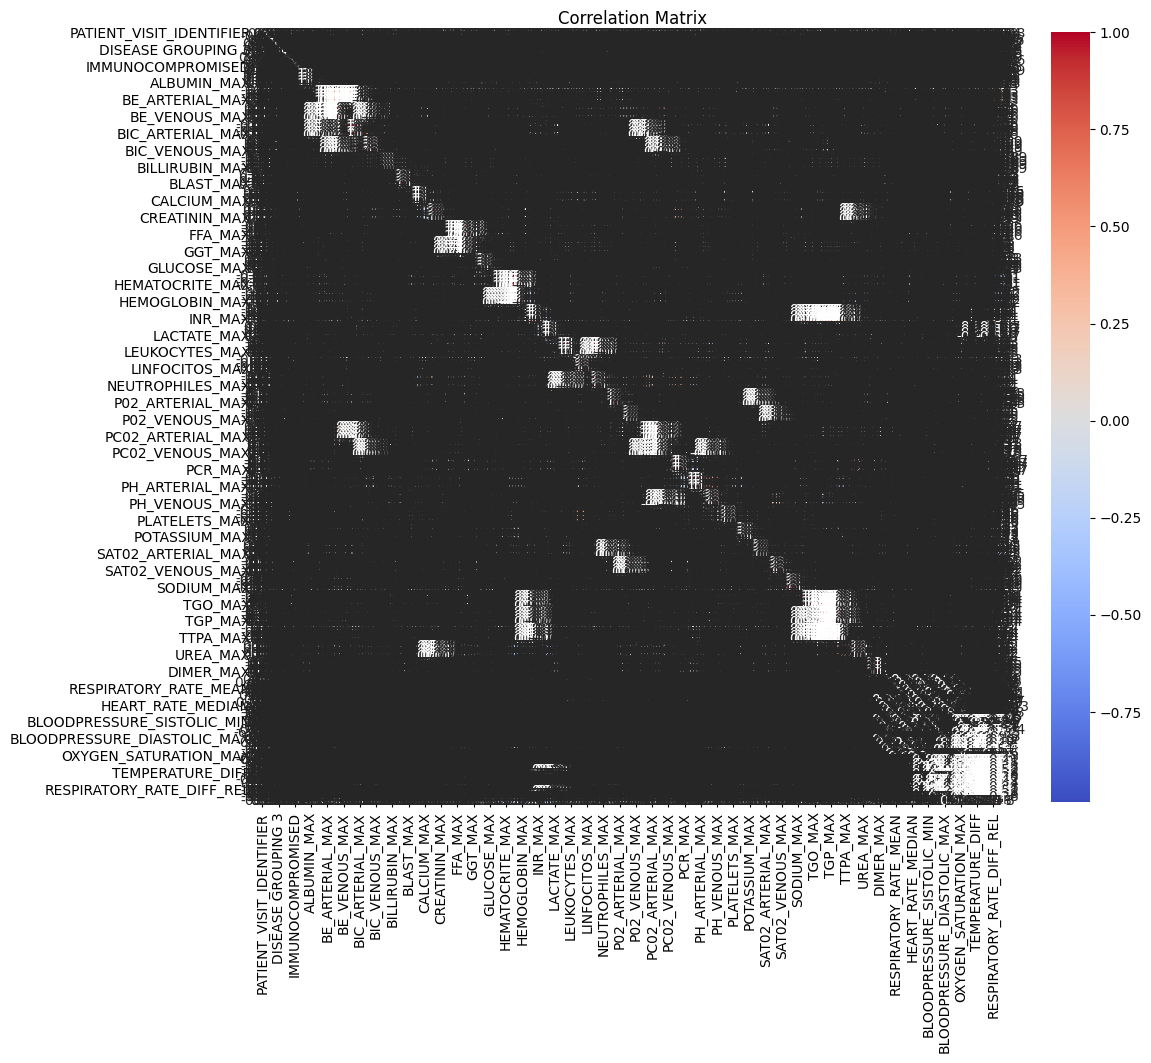

In [ ]:
# Correlation matrix to uncover relationships between variables
numeric_data = data.select_dtypes(include=[np.number])  # Select only numeric columns
corr_matrix = numeric_data.corr()  # Calculate correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

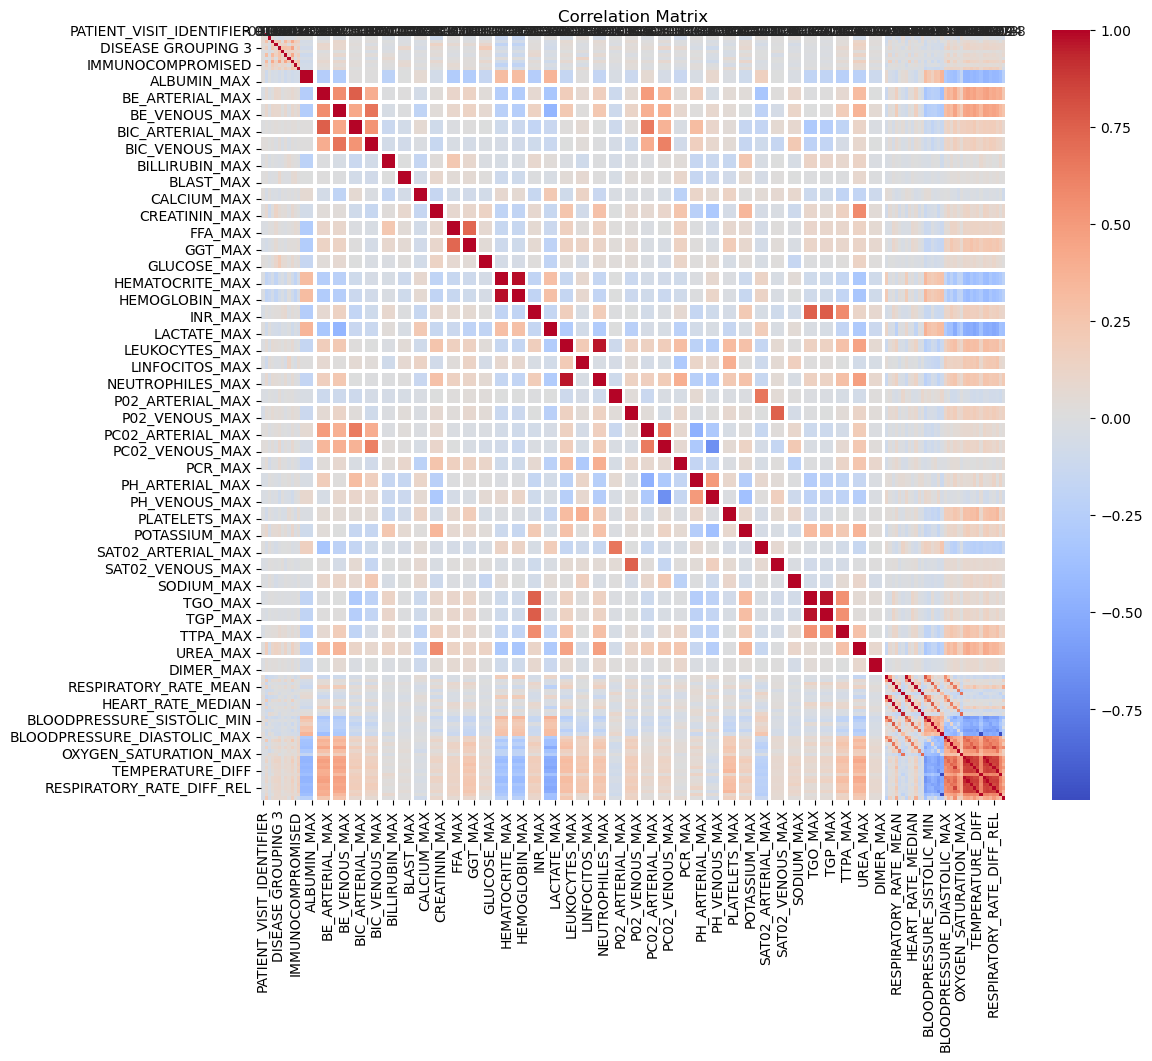

**Observations from the Correlation Matrix.** Based on the correlation matrix, the following observations can be made:

1.   **Strong Correlations:** The bottom right corner of the matrix shows a cluster of strongly correlated variables, particularly among the vital signs and physiological measurements. These variables are highly interrelated, which is expected as they often fluctuate together in response to a patient's health status.

2.   **Negative Correlations:** Some variables exhibit strong negative correlations. For example, RESPIRATORY_RATE_MEAN and OXYGEN_SATURATION_MEAN show a notable negative correlation. This implies that as the respiratory rate increases, oxygen saturation tends to decrease, which is clinically relevant and indicates respiratory distress.

3.   **Low to Moderate Correlations:** Many of the variables in the central portion of the matrix display low to moderate correlations with each other. This suggests a diverse set of measurements that capture different aspects of patient health, with less direct interdependence.

4.   **Clinical Relevance:** The observed correlations align with clinical expectations. For instance, blood pressure measurements are positively correlated with each other, reflecting the interdependence of systolic and diastolic pressures.

**Hypotheses for Predictive Insights:** Based on the provided EDA and visualizations from the dataset, several predictive insights can be formulated as hypotheses:

1.   **Age and ICU Admission:** Older patients, particularly those aged above 65, are likely to have a higher probability of ICU admission. This hypothesis is derived from the observed distribution of age groups and their corresponding ICU admission rates.

2.   **Comorbidities and ICU Admission:** Patients with multiple comorbidities, as indicated by various disease groupings, are expected to have a higher likelihood of ICU admission. The analysis of the disease grouping variables suggests a correlation between the number of comorbidities and the severity of the patient's condition, potentially leading to ICU admission.

3.   **Physiological Measurements and ICU Admission:** Significant deviations in physiological measurements, such as heart rate, systolic blood pressure, and diastolic blood pressure, are anticipated to correlate with higher ICU admission rates. The visualizations of these continuous variables, especially through box plots, reveal that extreme values in these measurements are more prevalent among ICU patients.

4.   **Gender and ICU Admission:** Gender might play a role in the likelihood of ICU admission, with potential differences observed between male and female patients. The distribution of ICU admissions across genders can help in understanding if one gender is more susceptible to severe outcomes requiring intensive care.

5.   **Oxygen Saturation and ICU Admission:** Lower oxygen saturation levels are expected to be associated with a higher probability of ICU admission. This hypothesis is based on the critical role of oxygen saturation in determining the respiratory health of COVID-19 patients.

**Ethical Considerations:** In undertaking the exploration and utilization of patient data to develop predictive models for ICU admissions, it is essential to uphold rigorous ethical standards. This analysis highlights several key ethical considerations that ensure the responsible application of data science and machine learning techniques, thereby enhancing patient outcomes while maintaining respect for patient rights and dignity.

1.   **Data Privacy:** The importance of anonymizing and de-identifying patient data cannot be overstated. By removing or obfuscating personal identifiers, the analysis safeguards against the potential misuse of sensitive information, thereby protecting individual privacy.

2.   **Bias Mitigation:** Identifying and addressing biases within the dataset is critical to preventing unfair or discriminatory outcomes. The analysis examines demographic variables such as age, gender, and race to ensure that the predictive models do not disproportionately impact any specific group, promoting equity in healthcare.

3.   **Transparency:** Transparency in the methods and algorithms used is vital. The analysis ensures that the processes are well-documented and that clear explanations are provided regarding how the models function, the data they utilize, and their inherent limitations. This transparency builds trust and allows for external validation and scrutiny.

4.   **Fairness and Equity:** The predictive models are designed to offer equitable care recommendations across different patient demographics. The analysis includes rigorous testing to confirm that the models perform consistently across all groups, avoiding inadvertent favouritism towards any particular group.

5.   **Informed Consent:** When patient data is used for predictive modelling and research, obtaining informed consent is crucial. Patients are made aware of how their data will be used, the potential benefits, and any associated risks, ensuring that their participation is voluntary and well-informed.

6.   **Beneficence and Non-maleficence:** The principles of beneficence and non-maleficence are central to the ethical use of predictive models. The analysis ensures that the models are used to enhance patient care and outcomes (beneficence) while avoiding harm, such as incorrect predictions leading to inappropriate treatment plans (non-maleficence).

7.   **Accountability:** Clear accountability mechanisms are established for the use of predictive models. This includes regular audits, monitoring model performance, and the ability to address and rectify any issues that arise, ensuring that the models are used responsibly.

8.   **Impact on Healthcare Resources:** Ethical considerations also encompass the impact of predictive models on healthcare resource allocation. The models are designed to optimize the use of limited resources, such as ICU beds and medical personnel, ensuring that these resources are allocated where they are most needed.

# **Data Preparation for ML**

The following steps provide a comprehensive approach to data preparation for machine learning, specifically tailored to the provided dataset. This process ensures that the dataset is clean, standardized, and ready for model training, significantly improving the chances of building a robust and accurate machine learning model. Proper data preparation is fundamental to the success of any machine learning project, as it directly impacts the model's performance and reliability.

**Handle Missing Values:** Handling missing values is crucial as they can lead to inaccuracies and errors in the model. Numerical columns are filled with their median values to avoid skewing the data. Categorical columns in this dataset did not contain any missing values.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'https://raw.githubusercontent.com/Peterkr-SOA/CP70066E/main/Kaggle_Sirio_Libanes_ICU_Prediction.xlsx'
data = pd.read_excel(file_path, engine='openpyxl')

# Fill missing values for numerical columns with median
numeric_columns = data.select_dtypes(include=[np.number]).columns
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].median())

**Outlier Detection and Treatment:** Outliers are extreme values that deviate significantly from other observations in the dataset. These outliers can distort statistical analyses and model training. To detect outliers, the z-score method is applied, which measures the number of standard deviations a data point is from the mean. Data points with a z-score greater than 3 are considered outliers and are removed from the dataset. This step ensures that the dataset is free from anomalies that could skew the model’s predictions.

In [ ]:
from scipy.stats import zscore

# Load the dataset
df = pd.read_excel('https://raw.githubusercontent.com/Peterkr-SOA/CP70066E/main/Kaggle_Sirio_Libanes_ICU_Prediction.xlsx', sheet_name='Sheet1')

# Detect outliers using z-score
numerical_columns = df.select_dtypes(include=[np.number]).columns
z_scores = np.abs(zscore(df[numerical_columns]))

# Filter out outliers
outliers = (z_scores > 3)
df_no_outliers = df[(outliers == False).all(axis=1)]

**Encode Categorical Variables:** Machine learning algorithms require numerical input, so categorical variables need to be encoded. Label encoding is used here, which converts categorical labels into integer values, making them suitable for most algorithms.

In [ ]:
# Label encode categorical variables
for col in ['AGE_PERCENTIL', 'WINDOW']:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])

**Feature Scaling:** Feature scaling standardizes the range of independent variables or features of data. StandardScaler is used to transform the data such that it has a mean of 0 and a standard deviation of 1. This process is essential for algorithms that are sensitive to the scales of input features.

In [ ]:
# Define numerical and categorical columns
num_cols = data.select_dtypes(include=[np.number]).columns
cat_cols = data.select_dtypes(include=[object]).columns

# Standardize numerical features
scaler = StandardScaler()
data[num_cols] = scaler.fit_transform(data[num_cols])

**Split the Dataset:** Splitting the dataset is crucial for evaluating the performance of the machine learning model. The data is typically split into training and testing sets, with the training set used to train the model and the testing set used to evaluate its performance. An 80-20 split is common practice.

In [ ]:
# Split the dataset into training and testing sets
X = data.drop('ICU', axis=1)
y = data['ICU']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Balancing the Dataset:** In classification problems, an imbalanced dataset can lead to biased models that perform well on the majority class but poorly on the minority class. SMOTE (Synthetic Minority Over-sampling Technique) is used to balance the dataset by generating synthetic samples for the minority class. This technique ensures that the model is trained on a balanced dataset, leading to more robust and fair predictions.

In [ ]:
# Ensure ICU column is integer
data['ICU'] = data['ICU'].astype(int)

# Use the ICU column as y_train
y_train = data['ICU']
X_train = data.drop(columns=['ICU'])

# Apply SMOTE to balance the training set
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

print("Balanced X_train shape:", X_train_balanced.shape)
print("Balanced y_train shape:", y_train_balanced.shape)

Balanced X_train shape: (2820, 230)
Balanced y_train shape: (2820,)


**Save the Prepared Data:** After data preparation, the processed training and testing sets are saved for future use. This step ensures that the same prepared data is used consistently across different stages of the machine learning workflow, from model training to evaluation.

In [ ]:
# Save the prepared data
X_train.to_csv('X_train.csv', index=False)
X_test.to_csv('X_test.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
y_test.to_csv('y_test.csv', index=False)

**Verifying the Processed Dataset:** After performing the data preparation steps, it is essential to verify the processed dataset to ensure the transformations have been applied correctly and the data is ready for model training. Here is a detailed explanation of how to verify the processed dataset:

1.   **View the First Few Rows:** To get an initial look at the data and verify that the preprocessing steps have been applied.

2.   **Check for Missing Values:** To ensure that there are no missing values in the processed dataset.

3.   **Check the Data Types:** To confirm that the data types of the columns are appropriate after encoding and scaling.

4.   **Describe the Dataset:** To get a statistical summary of the dataset, which helps in understanding the distribution of numerical features after scaling.

5.   **Visualize the Distribution of Features:** To visualize the distribution of numerical features to ensure that scaling has been applied correctly.

6.   **Check the Target Distribution:** To visualize the distribution of the target variable and ensure it is balanced.

In [ ]:
# Display first few rows of the processed training set
print("First few rows of the processed training set:")
print(X_train.head())

First few rows of the processed training set:
   PATIENT_VISIT_IDENTIFIER  AGE_ABOVE65  AGE_PERCENTIL    GENDER  \
0                 -1.727558     1.067187       0.237396 -0.764436   
1                 -1.727558     1.067187       0.237396 -0.764436   
2                 -1.727558     1.067187       0.237396 -0.764436   
3                 -1.727558     1.067187       0.237396 -0.764436   
4                 -1.727558     1.067187       0.237396 -0.764436   

   DISEASE GROUPING 1  DISEASE GROUPING 2  DISEASE GROUPING 3  \
0           -0.348054           -0.169887           -0.328987   
1           -0.348054           -0.169887           -0.328987   
2           -0.348054           -0.169887           -0.328987   
3           -0.348054           -0.169887           -0.328987   
4           -0.348054           -0.169887           -0.328987   

   DISEASE GROUPING 4  DISEASE GROUPING 5  DISEASE GROUPING 6  ...  \
0           -0.141908            2.612509            4.515406  ...   
1       

In [ ]:
# Check for missing values in the processed training set
print("\nMissing values in the processed training set:")
print(X_train.isnull().sum())


Missing values in the processed training set:
PATIENT_VISIT_IDENTIFIER      0
AGE_ABOVE65                   0
AGE_PERCENTIL                 0
GENDER                        0
DISEASE GROUPING 1            0
                             ..
HEART_RATE_DIFF_REL           0
RESPIRATORY_RATE_DIFF_REL     0
TEMPERATURE_DIFF_REL          0
OXYGEN_SATURATION_DIFF_REL    0
WINDOW                        0
Length: 230, dtype: int64


In [ ]:
# Check the data types of the processed training set columns
print("\nData types of the processed training set columns:")
print(X_train.dtypes)


Data types of the processed training set columns:
PATIENT_VISIT_IDENTIFIER      float64
AGE_ABOVE65                   float64
AGE_PERCENTIL                 float64
GENDER                        float64
DISEASE GROUPING 1            float64
                               ...   
HEART_RATE_DIFF_REL           float64
RESPIRATORY_RATE_DIFF_REL     float64
TEMPERATURE_DIFF_REL          float64
OXYGEN_SATURATION_DIFF_REL    float64
WINDOW                        float64
Length: 230, dtype: object


In [ ]:
# Get a statistical summary of the processed training set
print("\nStatistical summary of the processed training set:")
print(X_train.describe())


Statistical summary of the processed training set:
       PATIENT_VISIT_IDENTIFIER   AGE_ABOVE65  AGE_PERCENTIL        GENDER  \
count              1.925000e+03  1.925000e+03   1.925000e+03  1.925000e+03   
mean               1.181162e-16  1.402630e-16   1.291896e-17  4.429357e-17   
std                1.000260e+00  1.000260e+00   1.000260e+00  1.000260e+00   
min               -1.727558e+00 -9.370426e-01  -1.506829e+00 -7.644358e-01   
25%               -8.637789e-01 -9.370426e-01  -8.091391e-01 -7.644358e-01   
50%                0.000000e+00 -9.370426e-01  -1.114492e-01 -7.644358e-01   
75%                8.637789e-01  1.067187e+00   9.350857e-01  1.308154e+00   
max                1.727558e+00  1.067187e+00   1.632776e+00  1.308154e+00   

       DISEASE GROUPING 1  DISEASE GROUPING 2  DISEASE GROUPING 3  \
count        1.925000e+03        1.925000e+03        1.925000e+03   
mean        -3.322018e-17       -4.060244e-17        2.030122e-17   
std          1.000260e+00        1.000

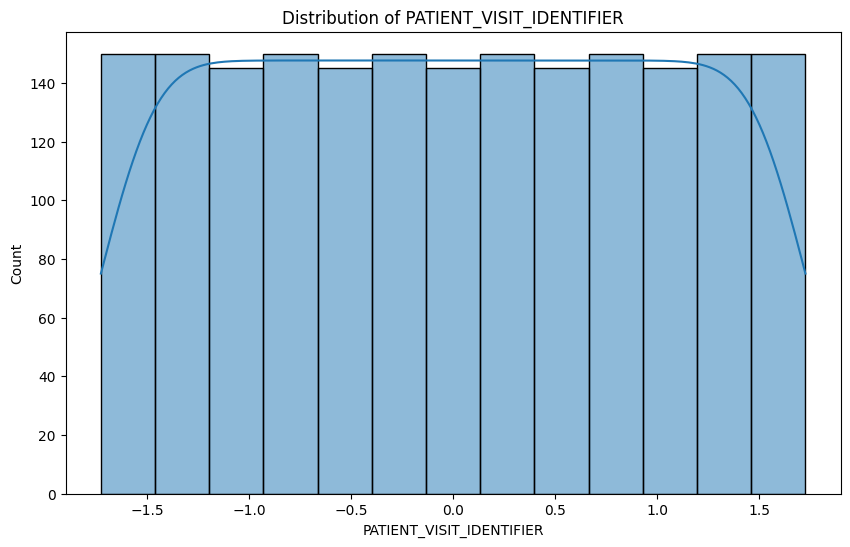

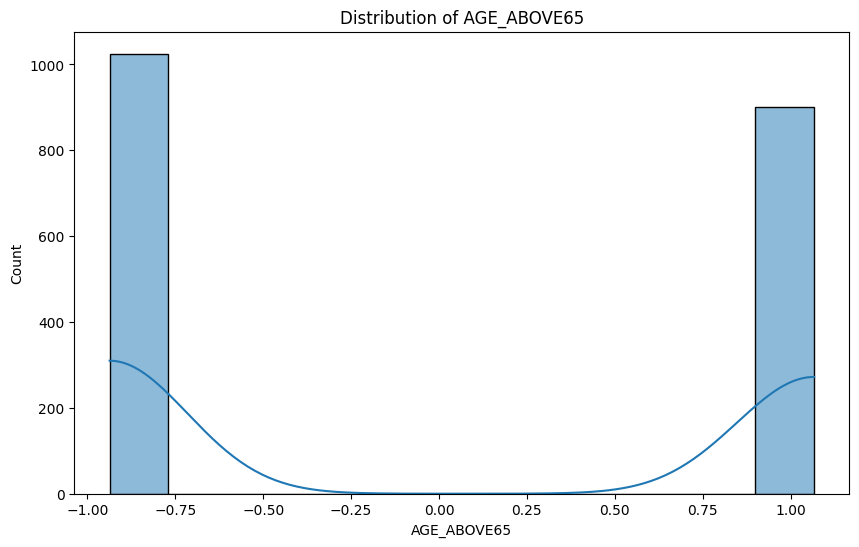

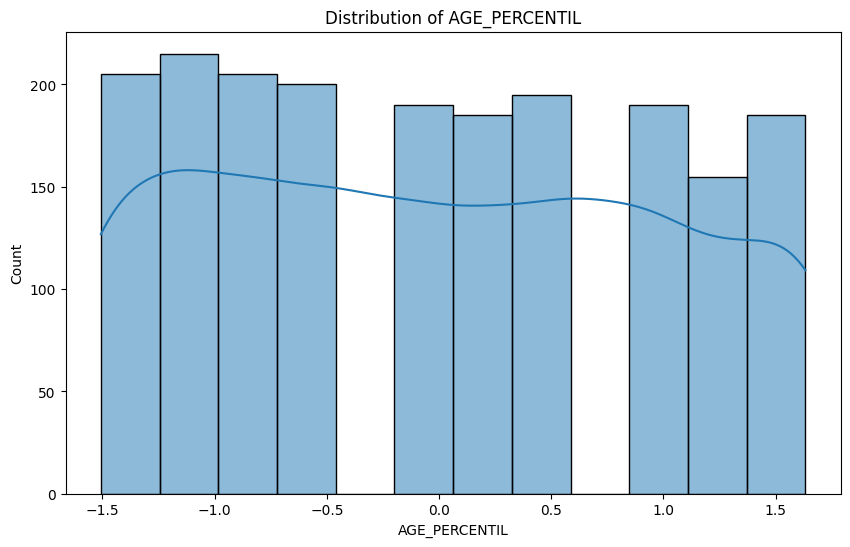

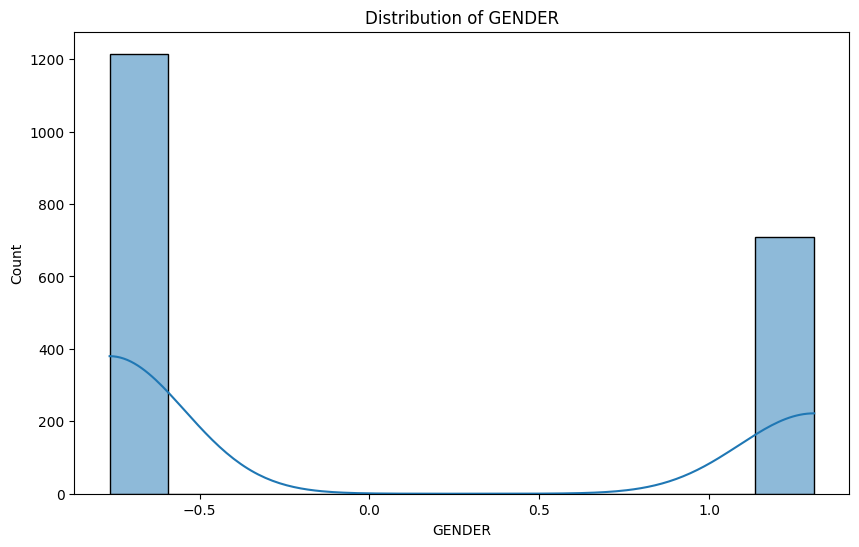

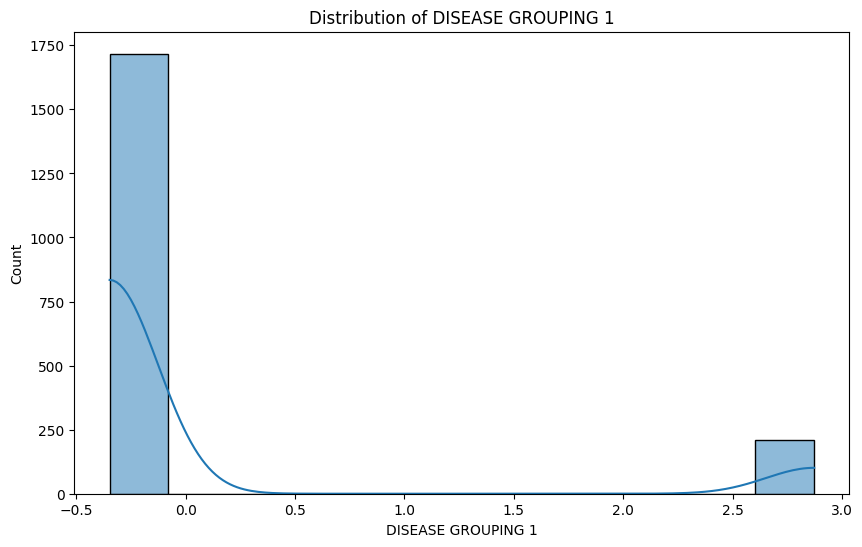

In [ ]:
# Visualize the distribution of a few numerical features
for col in num_cols[:5]:  # Visualize first 5 numerical columns
    plt.figure(figsize=(10, 6))
    sns.histplot(X_train[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

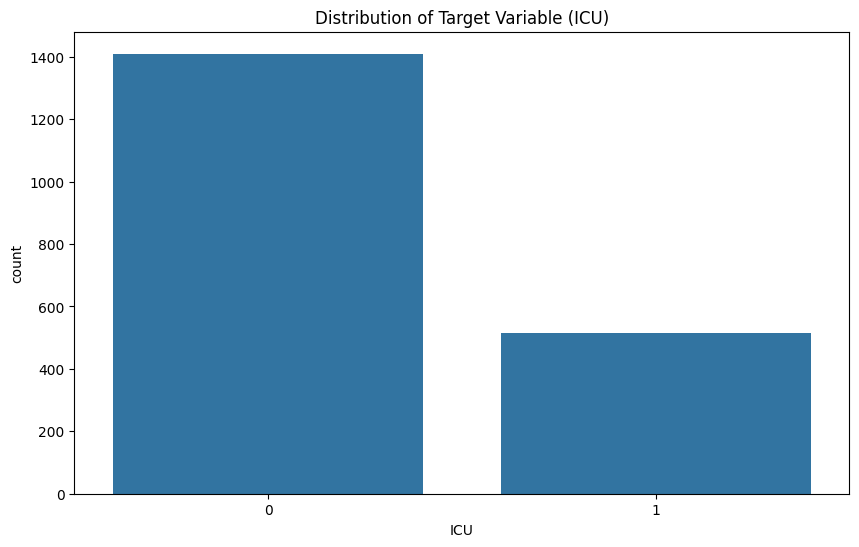

In [ ]:
# Check the distribution of the target variable
plt.figure(figsize=(10, 6))
sns.countplot(x=y_train)
plt.title('Distribution of Target Variable (ICU)')
plt.show()

# **References**

Johns Hopkins University (2021) *COVID-19 Dashboard by the Centre for Systems Science and Engineering (CSSE) at Johns Hopkins University (JHU)', Johns Hopkins Coronavirus Resource Centre.* Available at: https://coronavirus.jhu.edu/map.html (Accessed 22 June 2021).

Hospital Sírio-Libanês (2020) *COVID-19 Dataset from Sírio Libanês', Kaggle.* Available at: https://www.kaggle.com/datasets/Sírio-Libanes/covid19 (Accessed 22 June 2021).